In [11]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math
import pandas as pd
import imutils.paths as path
from tqdm import tqdm
import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [12]:
path1 = 'F:/applications/python/Klasifikasi_Daun_Sawi/2_EKSTRAKSI_WARNA/datasetDataTraining.csv'
path2 = 'F:/applications/python/Klasifikasi_Daun_Sawi/2_EKSTRAKSI_WARNA/datasetDataTesting.csv'

datalengkap = pd.concat(
    map(pd.read_csv, [path1, path2]), ignore_index=True)

datalengkap.to_csv(r'datasetKeseluruhan.csv', index=False)
datalengkap

,Citra,energy_0,homogenity_0,entrophy_0,contrast_0,energy_45,homogenity_45,entrophy_45,contrast_45,energy_90,...,entrophy_90,contrast_90,energy_135,homogenity_135,entrophy_135,contrast_135,Label,Warna_R,Warna_G,Warna_B
0,1.png,0.001033,17.871236,7.360620,16.871236,0.000736,37.274097,7.708917,36.274097,0.000944,...,7.448398,20.731886,0.000731,33.663376,7.690829,32.663376,0,0.239811,0.728622,0.000530
1,10.png,0.001623,14.459853,7.046904,13.459853,0.001078,23.535453,7.424661,22.535453,0.001300,...,7.180241,12.761809,0.001012,28.172632,7.450419,27.172632,0,0.000046,0.982006,0.015762
2,100.png,0.002920,5.739939,6.398762,4.739939,0.001843,18.810911,6.914203,17.810911,0.002322,...,6.688700,11.943413,0.001893,15.143661,6.859910,14.143661,0,0.002766,0.874546,0.096859
3,101.png,0.003383,3.999953,6.200812,2.999953,0.002321,9.230300,6.632160,8.230300,0.002653,...,6.513021,7.122109,0.002059,12.030593,6.752569,11.030593,0,0.003716,0.720688,0.229462
4,102.png,0.003391,5.682657,6.217107,4.682657,0.002490,10.934372,6.594616,9.934372,0.002791,...,6.473635,8.772694,0.002118,16.682133,6.707306,15.682133,0,0.002609,0.643875,0.312412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,496.png,0.001088,50.775371,7.613240,49.775371,0.000716,104.308305,8.007883,103.308305,0.001011,...,7.642005,46.355071,0.000879,74.801173,7.816338,73.801173,1,0.006104,0.982117,0.009972
995,497.png,0.000741,36.961629,7.810223,35.961629,0.000534,74.412248,8.135582,73.412248,0.000728,...,7.802012,35.176691,0.000580,62.102036,8.069667,61.102036,1,0.001957,0.997318,0.000259
996,498.png,0.000854,41.176505,7.729564,40.176505,0.000561,85.892614,8.115614,84.892614,0.000734,...,7.830550,45.031126,0.000607,73.970467,8.039630,72.970467,1,0.000000,0.999992,0.000004
997,499.png,0.001230,36.029123,7.377756,35.029123,0.000869,75.448798,7.713946,74.448798,0.001153,...,7.435106,40.266887,0.000889,62.543016,7.679444,61.543016,1,0.013554,0.935749,0.034882


In [13]:
enc = LabelEncoder()
datasets = pd.read_csv('F:/applications/python/Klasifikasi_Daun_Sawi/3_KLASIFIKASIC45/datasetKeseluruhan.csv')
datasets['Label'] = enc.fit_transform(datasets['Label'].values)
datasets

,Citra,energy_0,homogenity_0,entrophy_0,contrast_0,energy_45,homogenity_45,entrophy_45,contrast_45,energy_90,...,entrophy_90,contrast_90,energy_135,homogenity_135,entrophy_135,contrast_135,Label,Warna_R,Warna_G,Warna_B
0,1.png,0.001033,17.871236,7.360620,16.871236,0.000736,37.274097,7.708917,36.274097,0.000944,...,7.448398,20.731886,0.000731,33.663376,7.690829,32.663376,0,0.239811,0.728622,0.000530
1,10.png,0.001623,14.459853,7.046904,13.459853,0.001078,23.535453,7.424661,22.535453,0.001300,...,7.180241,12.761809,0.001012,28.172632,7.450419,27.172632,0,0.000046,0.982006,0.015762
2,100.png,0.002920,5.739939,6.398762,4.739939,0.001843,18.810911,6.914203,17.810911,0.002322,...,6.688700,11.943413,0.001893,15.143661,6.859910,14.143661,0,0.002766,0.874546,0.096859
3,101.png,0.003383,3.999953,6.200812,2.999953,0.002321,9.230300,6.632160,8.230300,0.002653,...,6.513021,7.122109,0.002059,12.030593,6.752569,11.030593,0,0.003716,0.720688,0.229462
4,102.png,0.003391,5.682657,6.217107,4.682657,0.002490,10.934372,6.594616,9.934372,0.002791,...,6.473635,8.772694,0.002118,16.682133,6.707306,15.682133,0,0.002609,0.643875,0.312412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,496.png,0.001088,50.775371,7.613240,49.775371,0.000716,104.308305,8.007883,103.308305,0.001011,...,7.642005,46.355071,0.000879,74.801173,7.816338,73.801173,1,0.006104,0.982117,0.009972
995,497.png,0.000741,36.961629,7.810223,35.961629,0.000534,74.412248,8.135582,73.412248,0.000728,...,7.802012,35.176691,0.000580,62.102036,8.069667,61.102036,1,0.001957,0.997318,0.000259
996,498.png,0.000854,41.176505,7.729564,40.176505,0.000561,85.892614,8.115614,84.892614,0.000734,...,7.830550,45.031126,0.000607,73.970467,8.039630,72.970467,1,0.000000,0.999992,0.000004
997,499.png,0.001230,36.029123,7.377756,35.029123,0.000869,75.448798,7.713946,74.448798,0.001153,...,7.435106,40.266887,0.000889,62.543016,7.679444,61.543016,1,0.013554,0.935749,0.034882


In [14]:
dataikan = datasets.drop(columns= 'Label')
databersih = dataikan.drop(columns='Citra')
databersih

,energy_0,homogenity_0,entrophy_0,contrast_0,energy_45,homogenity_45,entrophy_45,contrast_45,energy_90,homogenity_90,entrophy_90,contrast_90,energy_135,homogenity_135,entrophy_135,contrast_135,Warna_R,Warna_G,Warna_B
0,0.001033,17.871236,7.360620,16.871236,0.000736,37.274097,7.708917,36.274097,0.000944,21.731886,7.448398,20.731886,0.000731,33.663376,7.690829,32.663376,0.239811,0.728622,0.000530
1,0.001623,14.459853,7.046904,13.459853,0.001078,23.535453,7.424661,22.535453,0.001300,13.761809,7.180241,12.761809,0.001012,28.172632,7.450419,27.172632,0.000046,0.982006,0.015762
2,0.002920,5.739939,6.398762,4.739939,0.001843,18.810911,6.914203,17.810911,0.002322,12.943413,6.688700,11.943413,0.001893,15.143661,6.859910,14.143661,0.002766,0.874546,0.096859
3,0.003383,3.999953,6.200812,2.999953,0.002321,9.230300,6.632160,8.230300,0.002653,8.122109,6.513021,7.122109,0.002059,12.030593,6.752569,11.030593,0.003716,0.720688,0.229462
4,0.003391,5.682657,6.217107,4.682657,0.002490,10.934372,6.594616,9.934372,0.002791,9.772694,6.473635,8.772694,0.002118,16.682133,6.707306,15.682133,0.002609,0.643875,0.312412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.001088,50.775371,7.613240,49.775371,0.000716,104.308305,8.007883,103.308305,0.001011,47.355071,7.642005,46.355071,0.000879,74.801173,7.816338,73.801173,0.006104,0.982117,0.009972
995,0.000741,36.961629,7.810223,35.961629,0.000534,74.412248,8.135582,73.412248,0.000728,36.176691,7.802012,35.176691,0.000580,62.102036,8.069667,61.102036,0.001957,0.997318,0.000259
996,0.000854,41.176505,7.729564,40.176505,0.000561,85.892614,8.115614,84.892614,0.000734,46.031126,7.830550,45.031126,0.000607,73.970467,8.039630,72.970467,0.000000,0.999992,0.000004
997,0.001230,36.029123,7.377756,35.029123,0.000869,75.448798,7.713946,74.448798,0.001153,41.266887,7.435106,40.266887,0.000889,62.543016,7.679444,61.543016,0.013554,0.935749,0.034882


In [15]:
datalabel = datasets['Label']
datalabel.value_counts()

Label
0    500
1    499
Name: count, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer


vec = TfidfVectorizer(lowercase=True)
X = vec.fit_transform(dataikan["Citra"])

xtrain, xtest, ytrain, ytest = train_test_split(databersih, datalabel, test_size=0.3, random_state=15)
tree_dataset = DecisionTreeClassifier(random_state=15)
tree_dataset.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=15)

Nilai Akurasi Algoritma C4.5
Akurasi               precision    recall  f1-score   support

           0       0.68      0.69      0.68       149
           1       0.69      0.68      0.68       151

    accuracy                           0.68       300
   macro avg       0.68      0.68      0.68       300
weighted avg       0.68      0.68      0.68       300

Tingkat Akurasi : 68 persen


Confusion Matrix


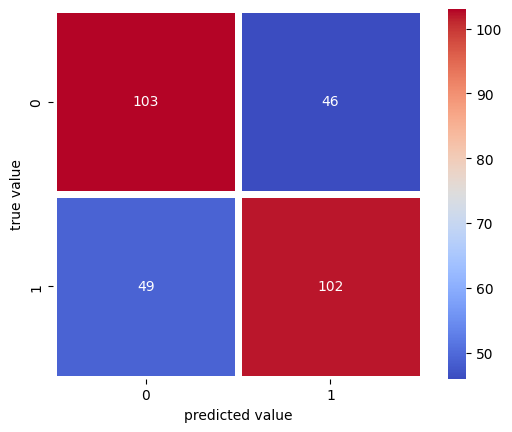

In [17]:
import warnings
warnings.filterwarnings('always') 

yprediction = tree_dataset.predict(xtest)
cm = confusion_matrix(ytest, yprediction)
# print("Confusion Matrix")
# print(cm)
# print('\n')

nilaiakurasi = classification_report(ytest, yprediction)
print("Nilai Akurasi Algoritma C4.5")
print("Akurasi", nilaiakurasi)

nilaiakurasi = accuracy_score(ytest, yprediction)
print("Tingkat Akurasi : %d persen" %(nilaiakurasi*100))

print('\n')
print("Confusion Matrix")
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap='coolwarm', linewidths=5)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

In [18]:
r_test=[]
valuepredection=[]
newlabel = []
prediction = []
status = []
namalabel = []

for i in ytest:
    r_test.append(i)
print("Label Awal", end= " ; ")
print("Label Prediksi C4.5")
for j in range(len(r_test)-1):
    newlabel.append(r_test[j])
    valuepredection.append(yprediction[j])

    print(r_test[j], end = " ; ")
    print(yprediction[j], end = " => ")
    if(r_test[j]==yprediction[j]):
        print("Benar")
        status.append("Benar")
    else:
        print("salah")
        status.append("Salah")
    

    if(r_test[j]==0):
        namalabel.append("Tidak berformalin")
        # print("0")
    else:
        namalabel.append("Berformalin")   
        # print("1")


Label Awal ; Label Prediksi C4.5
1 ; 1 => Benar
0 ; 0 => Benar
0 ; 0 => Benar
1 ; 1 => Benar
0 ; 0 => Benar
0 ; 0 => Benar
0 ; 0 => Benar
1 ; 1 => Benar
0 ; 1 => salah
1 ; 1 => Benar
1 ; 1 => Benar
0 ; 1 => salah
1 ; 0 => salah
1 ; 0 => salah
0 ; 0 => Benar
0 ; 0 => Benar
1 ; 0 => salah
0 ; 0 => Benar
1 ; 0 => salah
0 ; 0 => Benar
0 ; 0 => Benar
1 ; 1 => Benar
0 ; 0 => Benar
1 ; 1 => Benar
0 ; 0 => Benar
0 ; 0 => Benar
1 ; 1 => Benar
1 ; 0 => salah
0 ; 1 => salah
1 ; 0 => salah
1 ; 1 => Benar
0 ; 1 => salah
0 ; 1 => salah
1 ; 0 => salah
1 ; 0 => salah
1 ; 1 => Benar
1 ; 1 => Benar
1 ; 1 => Benar
1 ; 1 => Benar
0 ; 1 => salah
1 ; 0 => salah
0 ; 0 => Benar
1 ; 0 => salah
0 ; 1 => salah
1 ; 1 => Benar
1 ; 1 => Benar
0 ; 1 => salah
1 ; 0 => salah
1 ; 1 => Benar
1 ; 0 => salah
0 ; 1 => salah
1 ; 0 => salah
1 ; 1 => Benar
0 ; 0 => Benar
0 ; 0 => Benar
1 ; 1 => Benar
1 ; 0 => salah
0 ; 1 => salah
0 ; 0 => Benar
1 ; 1 => Benar
0 ; 1 => salah
1 ; 1 => Benar
0 ; 0 => Benar
0 ; 0 => Benar
0 ; 0 =

In [19]:
namatabel = ["Label Awal"]

dataprediksi = pd.DataFrame(newlabel, columns=namatabel)
dataprediksi.insert(1, column = "Label Prediksi", value = valuepredection) 
dataprediksi.insert(2, column = "Status", value = status)  
dataprediksi.insert(3, column = "Label Ikan", value = namalabel)  
dataprediksi

,Label Awal,Label Prediksi,Status,Label Ikan
0,1,1,Benar,Berformalin
1,0,0,Benar,Tidak berformalin
2,0,0,Benar,Tidak berformalin
3,1,1,Benar,Berformalin
4,0,0,Benar,Tidak berformalin
...,...,...,...,...
294,0,0,Benar,Tidak berformalin
295,0,1,Salah,Tidak berformalin
296,0,1,Salah,Tidak berformalin
297,1,1,Benar,Berformalin


In [20]:
dataprediksi.value_counts()

Label Awal  Label Prediksi  Status  Label Ikan       
0           0               Benar   Tidak berformalin    102
1           1               Benar   Berformalin          102
            0               Salah   Berformalin           49
0           1               Salah   Tidak berformalin     46
Name: count, dtype: int64